# How to Sample from the Pooled Data

In {doc}`Section 3.3<../03-first-data/hypothesis-testing>`, I introduced one way to sample from the pooled data, bootstrap sampling. In this section, we will delve a little bit deeper into ways to sample from the pooled data and the different implications of these different ways. In general, sampling can either be *with replacement* or *without replacement*. Sampling with replacement is called bootstrapping. Sampling without replacement is called *permutation testing*. It is easiest to see the differences among these approaches if we use a small data set with unique values. Consider whether a professor's course grades increased after the professor was promoted.  The table below shows the average course grade for the graduate course EEE 5544 Stochastic Methods for Engineering I at the University of Florida over six semesters with the same professor:


|Year | Grade|
|-|-|
|2013|74.1|
|2014|74.5|
|2015|79.4|
|2016|79.0|
|2018|78.4|
|2019|79.3|

Note that the grades are all distinct. The professor was promoted between the 2014 and 2015 courses. Let's compare the average of the course grades pre- and post-promotion:

In [8]:
import numpy as np
grades1=np.array([74.1, 74.5])
grades2=np.array([79.4,79.0, 78.4,79.3])

In [10]:
np.mean(grades1), np.mean(grades2)

(74.3, 79.025)

We observe that the average of the course grades increased from 74.3 before the professor's promotion to 79.025 after the professor's promotion.  We can define the test statistic as the difference between these averaged course grades:

In [78]:
np.round(np.mean(grades2) - np.mean(grades1),3)

4.725



We will pool the data and then consider different resampling approaches below. The pooled data is

In [79]:
pooled = np.hstack( (grades1, grades2) )

## Bootstrap Sampling

We begin by reconsidering bootstrap sampling, which is also simply called *bootstrapping*. **Bootstrapping is used when we want to better characterize a test statistic under a particular hypothesis.** Bootstrapping approximates drawing values from the sampling distribution of the test statistic by instead randomly sampling from the pooled data.  **Boostrapping uses sampling with replacement**, so a single value in the pooled data may appear multiple times in a test sample. As in {doc}`Section 3.3<../03-first-data/hypothesis-testing>`, we will use `npr.choice()` to sample from the pooled data; by default, `npr.choice()` samples *with replacement*. 

The code cell below contains a simulation that draws 20 bootstrap samples of the data. In each iteration, we construct a sample version **for each group**, and we print out the grades in each group, as well as a list of the repeated values across the two sample groups:


In [76]:

import numpy.random as npr
num_sims = 20


# Don't worry about how to do all this fancy f-string formatting!
print(f'{"iter":^6} {"pre-tenure":16} {"post-tenure":^24}  {"repeated values":^20}')
print(f'{"----":^6} {"-"*14:^16} {"-"*22:^24}  {"-"*22:^20}')
for sim in range(num_sims):
  sample1 = npr.choice(pooled, len(grades1) )
  sample2 = npr.choice(pooled, len(grades2) )

  # Find the repeated values
  vals, counts = np.unique(np.hstack( (sample1, sample2) ) , return_counts=True)

  print(f'{sim:^6} {str(sample1):16} {str(sample2):^24}  {  str(vals[np.where(counts >1 )]):^20}')


 iter  pre-tenure             post-tenure           repeated values   
 ----   --------------   ----------------------   ----------------------
  0    [74.5 74.5]       [79.3 79.3 79.  74.5]        [74.5 79.3]     
  1    [74.5 79. ]       [79.  74.1 79.4 79.4]        [79.  79.4]     
  2    [79.3 79. ]       [74.5 74.5 74.1 74.5]           [74.5]       
  3    [74.1 79. ]       [79.3 78.4 78.4 74.5]           [78.4]       
  4    [78.4 79.4]       [74.1 74.1 78.4 78.4]        [74.1 78.4]     
  5    [79.  79.3]       [79.4 79.3 78.4 79.4]        [79.3 79.4]     
  6    [79. 79.]         [78.4 78.4 79.  79. ]        [78.4 79. ]     
  7    [74.1 74.1]       [74.1 79.4 79.4 74.5]        [74.1 79.4]     
  8    [78.4 78.4]       [74.1 74.1 79.4 79. ]        [74.1 78.4]     
  9    [79.3 74.1]       [74.5 79.4 79.  78.4]             []         
  10   [74.1 79. ]       [74.5 79.3 74.5 78.4]           [74.5]       
  11   [79.4 78.4]       [74.1 79.4 74.5 74.5]        [74.5 79.4]     
  12

It is likely that every group has at least one repeated value. In fact, the probability of having no repeats in an iteration is about $1.5 \times 10^{-2}$.  The probability of having at least one row with no repeats in the table is approximately 0.267, so if you run this repeatedly, you should see some rows with no repeats occasionally.

The purpose of bootstrapping is to approximate drawing from the sampling distribution of the test statistic. Our test statistic is the difference in averages of the two groups, so to create the bootstrap samples of the test statistic, we will calculate the averages for each test group and then calculate the difference:

In [85]:
num_sims = 20


# Don't worry about how to do all this fancy f-string formatting!
print(f'{"iter":^6} {"pre-tenure avg":16} {"post-tenure avg":^24}  {"sample test stat":^20}')
print(f'{"----":^6} {"-"*14:^16} {"-"*22:^24}  {"-"*22:^20}')
for sim in range(num_sims):
  sample1 = npr.choice(pooled, len(grades1) )
  sample2 = npr.choice(pooled, len(grades2) )

  print(f'{sim:^6} {str(np.round(sample1.mean(),3)):16} {str(np.round(sample2.mean(), 3)):^24}'  \
        + f'{ str(np.round(sample2.mean() - sample1.mean(),3)) :^20}')



 iter  pre-tenure avg       post-tenure avg         sample test stat  
 ----   --------------   ----------------------   ----------------------
  0    79.0                      77.925                -1.075       
  1    74.3                      78.875                4.575        
  2    79.0                       77.8                  -1.2        
  3    79.15                      77.8                 -1.35        
  4    78.9                       77.7                  -1.2        
  5    79.15                      79.2                  0.05        
  6    76.9                      77.625                0.725        
  7    76.7                      77.775                1.075        
  8    76.75                     78.05                  1.3         
  9    74.3                       77.8                  3.5         
  10   79.4                       78.0                  -1.4        
  11   76.55                     78.05                  1.5         
  12   74.3                 

Note that we get both positive and negative values for the sample test statistic.  This should be expected under the null hypothesis, as the data from the two groups is coming from the same distribution. We can further explore this by looking at the distribution of the values of the sample test statistic using a histogram. The code below generates a histogram from 100,000 sample test statistics created using bootstrapping:

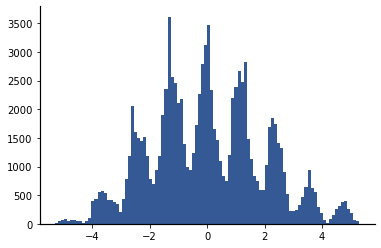

In [101]:
import matplotlib.pyplot as plt

num_sims = 100_000
diffs = np.zeros(num_sims)

for sim in range(num_sims):
  sample1 = npr.choice(pooled, len(grades1) )
  sample2 = npr.choice(pooled, len(grades2) )
  diffs[sim] = sample2.mean() - sample1.mean()


plt.hist(diffs, bins = 100);

Although the histogram will not be completely symmetric, it should be symmetric enough to see that the actual distribution of the bootstrap test statistic is symmetric around 0. A NHST can be conducted using this distribution by determining the probability of being in a tail determined by the observed value of the test statistic. For instance, if we wish to conduct a one-sided test, we can estimate the probability of seeing a value as high as the observed difference in averages by determining the relative frequency of such events, as shown below:

In [103]:
num_sims = 100_000
count = 0

observed_diff = np.round(np.mean(grades2) - np.mean(grades1),3)

for sim in range(num_sims):
  # Generate test statistic
  sample1 = npr.choice(pooled, len(grades1) )
  sample2 = npr.choice(pooled, len(grades2) )
  sample_diff = sample2.mean() - sample1.mean()
  
  # Count if at least as large as observed test difference
  if sample_diff >= observed_diff:
    count += 1
    
print(f'Relative frequency of events with difference >= {observed_diff:.3f} is {count/num_sims}')

  

Relative frequency of events with difference >= 4.725 is 0.01196


If we are using $\alpha=0.05$ as a threshold for statistical significance, then the result is  statistically significant. Even with this small data set, the difference is big enough that we **reject the null hypothesis at the $p < 0.05$ level**.

## Permutation Tests

When we carried out the bootstrap test, we observed that almost every row had repeated values of the data.  This is attributable to resampling with replacement, and the probability of at least one repeated value increases as the size of the data increases.  There is also nothing preventing the sample groups from repeating in different iterations, although the probability of repeated sample groups decreases with the size of the data. 

If our goal is to conduct a statistical test that directly breaks any dependence on the assignment of the data to the two groups, then it makes more sense to consider simply shuffling, or *permuting*, the data among the groups, with no repetitions allowed.  When the data is small, we can simply try every permutation of the data across the two groups. This is called an *exact permutation test*:

````{card}
DEFINITION
^^^
```{glossary}
exact permutation test
    The data is permuted among the groups in every possible order. (No data is repeated.)
```
````


For instance, with six data points, the number of permutations is $6! = 720$. If we want to carry out a NHST, we can compute the test difference for each permutation and determine the proportion of permutations that result in sample test statistics greater than our observed test difference. 

We will use the `itertools` library to find every permutation of the data across the two groups. Let's first see how to get every permutation of a list of sequential integers:

In [109]:
import itertools
for perm in itertools.permutations(range(3)):
  print(perm)

(0, 1, 2)
(0, 2, 1)
(1, 0, 2)
(1, 2, 0)
(2, 0, 1)
(2, 1, 0)


For three values, we expect $3!=6$ permutations, which is what we observe.


```{note}
`itertools.permutations()` returns a special object that can be iterated over but that you can't directly get individual values from.
Thus, we will always use `itertools.permutations()` in a `for ... in ` statement.


To find permutations into two groups, we first permute the entire pooled data and then partition according to the size of the two groups. For instance, here are the first 10 permutations of the pooled data:

In [112]:

for i,perm in enumerate(itertools.permutations(pooled)):
  print(perm)
  if i >=10:
    break
  

(74.1, 74.5, 79.4, 79.0, 78.4, 79.3)
(74.1, 74.5, 79.4, 79.0, 79.3, 78.4)
(74.1, 74.5, 79.4, 78.4, 79.0, 79.3)
(74.1, 74.5, 79.4, 78.4, 79.3, 79.0)
(74.1, 74.5, 79.4, 79.3, 79.0, 78.4)
(74.1, 74.5, 79.4, 79.3, 78.4, 79.0)
(74.1, 74.5, 79.0, 79.4, 78.4, 79.3)
(74.1, 74.5, 79.0, 79.4, 79.3, 78.4)
(74.1, 74.5, 79.0, 78.4, 79.4, 79.3)
(74.1, 74.5, 79.0, 78.4, 79.3, 79.4)
(74.1, 74.5, 79.0, 79.3, 79.4, 78.4)


To partition the data, we can simply split each returned tuple using indexing:

In [116]:

for i,perm in enumerate(itertools.permutations(pooled)):
  print(perm[:len(grades1)], perm[len(grades1):])
  if i >=10:
    break
  

(74.1, 74.5) (79.4, 79.0, 78.4, 79.3)
(74.1, 74.5) (79.4, 79.0, 79.3, 78.4)
(74.1, 74.5) (79.4, 78.4, 79.0, 79.3)
(74.1, 74.5) (79.4, 78.4, 79.3, 79.0)
(74.1, 74.5) (79.4, 79.3, 79.0, 78.4)
(74.1, 74.5) (79.4, 79.3, 78.4, 79.0)
(74.1, 74.5) (79.0, 79.4, 78.4, 79.3)
(74.1, 74.5) (79.0, 79.4, 79.3, 78.4)
(74.1, 74.5) (79.0, 78.4, 79.4, 79.3)
(74.1, 74.5) (79.0, 78.4, 79.3, 79.4)
(74.1, 74.5) (79.0, 79.3, 79.4, 78.4)


Finally, we can carry out a NHST by determining the proportion of permutations that result in a sample test statistic as large as the observed test difference:

In [127]:
num_perms=0
count = 0

observed_diff = np.round(np.mean(grades2) - np.mean(grades1),3)

for perm in itertools.permutations(pooled):
  num_perms += 1
  # Split the permuted data across the two sample groups
  sample1 = np.array(perm[: len(grades1)] )
  sample2 = np.array(perm[len(grades1) : ] )
  # Compute the test statistic
  sample_diff = sample2.mean() - sample1.mean()
  
  # Count if at least as large as observed test difference
  if sample_diff >= observed_diff:
    count += 1
    
print(f'After {num_perms} permutations:')
print(f'Proportion of events with difference >= {observed_diff:.3f} is {count/num_perms}')

  

After 720 permutations:
Proportion of events with difference >= 4.725 is 0.06666666666666667


The proportion of permutations with difference as large as that observed is 6.67%, so the null hypothesis cannot be rejected at the $\alpha=0.05$ level. Note that the calculated $p$-value is larger than for the bootstrap test; this is typical of permutation tests. They are more conservative, in the sense that the null hypothesis is less likely to be rejected than if a bootstrap test were applied.

One problem with exact permutation tests is that the number of possible permutations grows exponentially with the length of the data. For 6 data points, there are only 720 permutations, but for 60 data points, there are approximately $8.3 \times 10^{81}$ permutations, which is too large to enumerate. As an alternative, we can use a *Monte Carlo permutation test*, in which permutations are drawn at random from the set of all permutations. This is equivalent to sampling *without replacement*, which we can do in Python using `npr.choice()` with the keyword parameter `replace = False`.

The simulation for a Monte Carlo permutation test is a hybrid between the simulation for bootstrapping and that for the exact permutation test. We draw the data using `npr.choice()`, but we need to get a full permutation of the data and split it among the two sample groups. An example is show below:

In [128]:
num_sims = 100_000
count = 0

observed_diff = np.round(np.mean(grades2) - np.mean(grades1),3)

for sim in range(num_sims):
  # Get a random permutation of the pooled data:
  perm = npr.choice(pooled, len(pooled), replace = False) 
  # Split the permuted data across the two sample groups
  sample1 = np.array(perm[: len(grades1)] )
  sample2 = np.array(perm[len(grades1) : ] )
  sample_diff = sample2.mean() - sample1.mean()
  
  # Count if at least as large as observed test difference
  if sample_diff >= observed_diff:
    count += 1
    
print(f'Relative frequency of events with difference >= {observed_diff:.3f} is {count/num_sims}')

  

Relative frequency of events with difference >= 4.725 is 0.06645


The relative frequency of the Monte Carlo test is very similar to the exact test. In this case, we have a lot of repetitions of the same permutations because there are only 720 unique permutations, but we are drawing 100,000 permutations at random. The computed relative frequency is an estimate of the proportion of permutations that meet the specified criteria.

## Which Test to Use?

Some factors you should consider when determining whether to use a bootstrap or permutation test:
* The bootstrap test is generally the most popular test, although this varies with the particular research community. 
* The goal of the bootstrap test is to approximate drawing values from the sampling distribution of the test statistic. If the reason for resampling is focused on the sampling distribution of the test statistic, then a bootstrap test should be used. We will give an example in the next section.
* If the goal of resampling is to break up any dependence on the data from the assignment to the underlying groups, then a permutation test makes the most sense. For instance, if each group represents a treatment, then the goal of resampling may be to break up the mapping of data to treatments; this would merit the use of a permutation test.
* When the data is small, an exact permutation test can consider every possible mapping of data to groups. 
* Permutation tests are generally more conservative than bootstrap tests in the sense that they generally produce larger $p$-values and are thus less likely to reject the null hypothesis and indicate statistical significance.

In the remainder of this book, we will primarily use bootstrap tests because of their simplicity and popularity. An exception is that we will use an exact permutation test for categorical data in {doc}`Chapter 12<../12-categorical-data/intro>`.  In the following section, we apply bootstrap tests on the questions we formulated about the impact of post-baccalaureate work on family wealth with the purpose of further investigating the meaning of $p$-values and how we can use full the bootstrap distribution of the test statistic to create confidence intervals.